# Compare the supplied Mean/Std with the reproduced Mean/Std

The authors of CondMDI supplied their Mean/Std in `dataset/HumanML3D_abs` alongside their adapted preprocessing scripts.  
The reproduced Mean/Std are calculated using the same preprocessing scripts and saved to `dataset/HumanML3D`.

This notebook compares the supplied Mean/Std with the reproduced Mean/Std.

In [1]:
%cd ..

/Users/jason/repos/MoLab/models/condmdi


/Users/jason/repos/MoLab/models/condmdi/.venv/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [19]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [8]:
orig_dataset = Path("dataset/HumanML3D_abs")
repro_dataset = Path("dataset/HumanML3D")

orig_mean = np.load(orig_dataset / "Mean_abs_3d.npy")
orig_std = np.load(orig_dataset / "Std_abs_3d.npy")

repro_mean = np.load(repro_dataset / "Mean_abs_3d.npy")
repro_std = np.load(repro_dataset / "Std_abs_3d.npy")

diff_mean = orig_mean - repro_mean
diff_std = orig_std - repro_std

diff_mean_df = pd.DataFrame(diff_mean)
diff_std_df = pd.DataFrame(diff_std)

In [126]:
hml_sections = {
    "root_angular": (0, 1),
    "root_xz_vel": (1, 3),
    "root_y_pos": (3, 4),
}

last_idx = 4

# Local Joint Position w.r.t. Root
for i in range(1, 22):
    hml_sections[f"joint_pos_{i}"] = (last_idx, last_idx + 3)
    last_idx += 3

# Local Joint Quaternion Rotation w.r.t. Root
for i in range(1, 22):
    hml_sections[f"joint_rot_{i}"] = (last_idx, last_idx + 6)
    last_idx += 6

# Global Joint Velocity (including root)
for i in range(0, 22):
    hml_sections[f"joint_vel_{i}"] = (last_idx, last_idx + 3)
    last_idx += 3

hml_sections["contact"] = (last_idx, last_idx + 4)
last_idx += 4

assert last_idx == 263



def plot_difference_with_hml_sections(name, data):
    plt.figure(figsize=(20, 6))
    plt.title(name)
    plt.plot(data)
    plt.grid(axis="y")

    plt.axvline(0, color="red", linestyle="--", linewidth=1, alpha=0.5)
    for section_name, (start, end) in hml_sections.items():
        plt.axvline(end, color="red", linestyle="--", linewidth=1, alpha=0.5)
        plt.text((start + end) / 2, plt.ylim()[1], section_name, color="red", rotation = 90, ha="center", va="bottom", fontsize=8)

    plt.xlabel("Features")
    plt.ylabel("Difference")
    plt.tight_layout()
    plt.show()



def plot_ab_with_hml_sections(name, data_a, data_b):
    plt.figure(figsize=(20, 6))
    plt.title(name)
    plt.plot(data_a, label="A", alpha=0.5)
    plt.plot(data_b, label="B", alpha=0.5)
    plt.grid(axis="y")

    plt.axvline(0, color="red", linestyle="--", linewidth=1, alpha=0.5)
    for section_name, (start, end) in hml_sections.items():
        plt.axvline(end, color="red", linestyle="--", linewidth=1, alpha=0.5)
        plt.text((start + end) / 2, plt.ylim()[1], section_name, color="red", rotation = 90, ha="center", va="bottom", fontsize=8)

    plt.xlabel("Features")
    plt.tight_layout()
    plt.show()

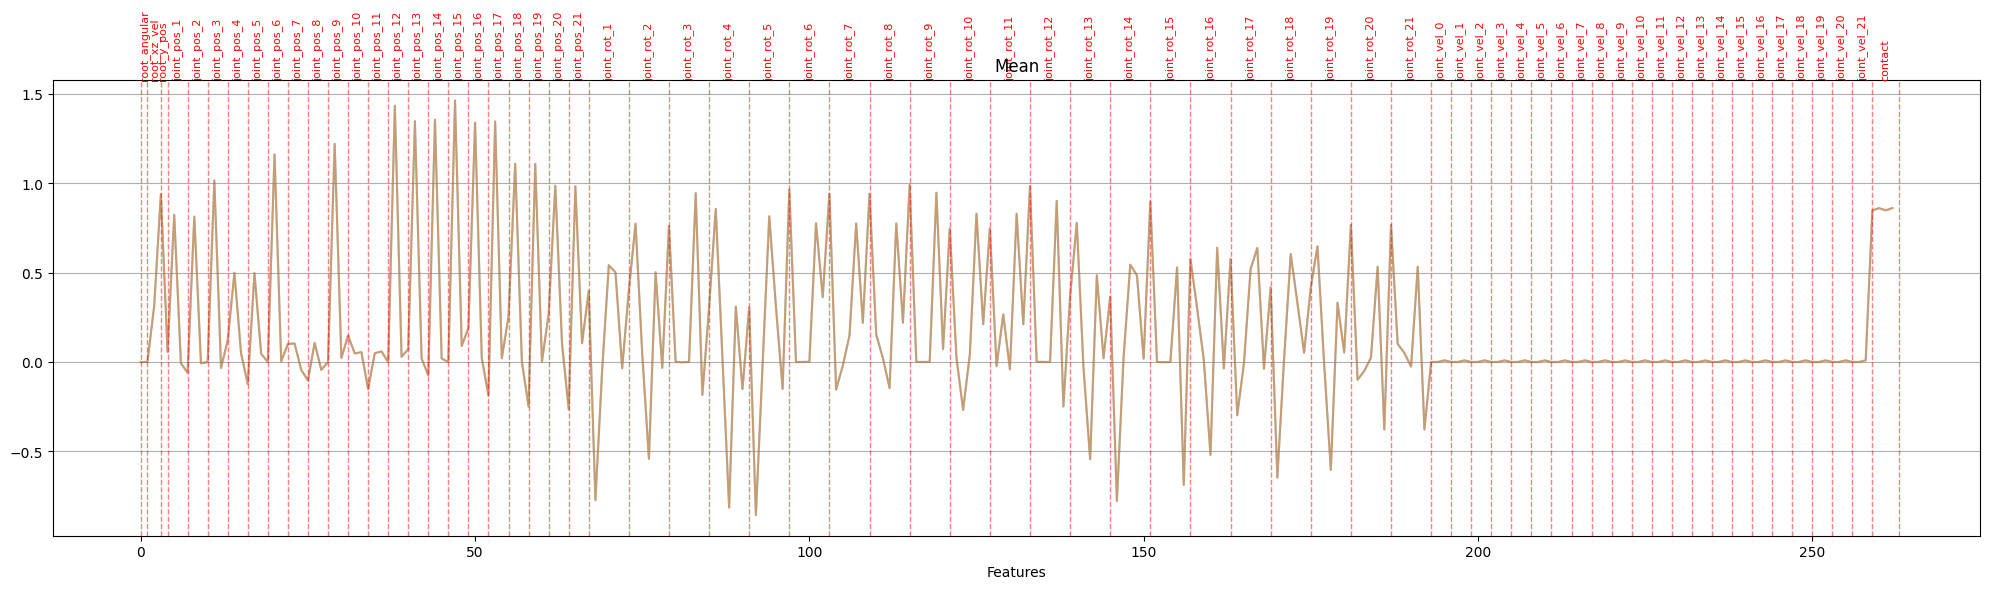

In [127]:
plot_ab_with_hml_sections("Mean", orig_mean, repro_mean)

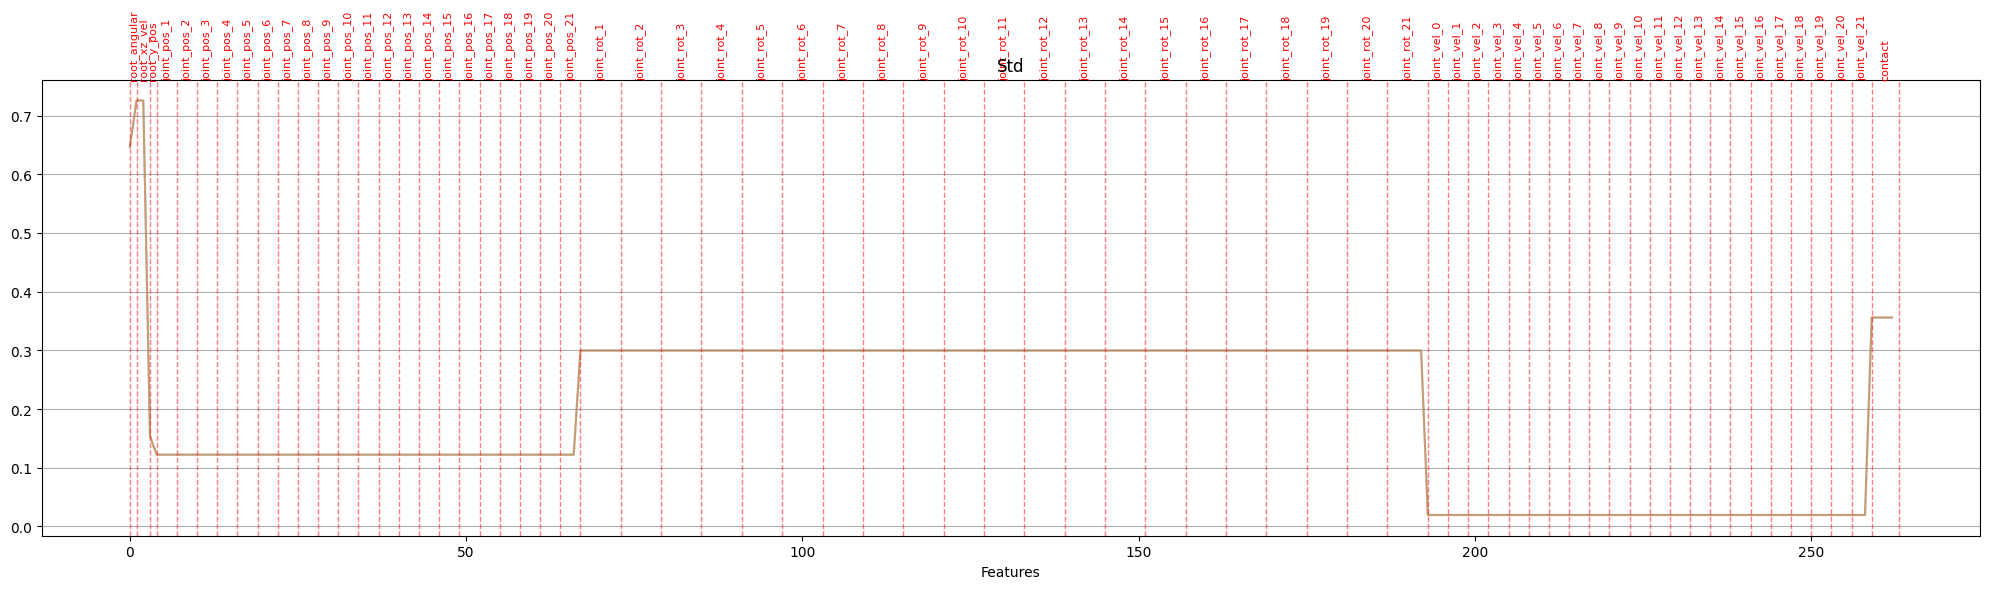

In [128]:
plot_ab_with_hml_sections("Std", orig_std, repro_std)

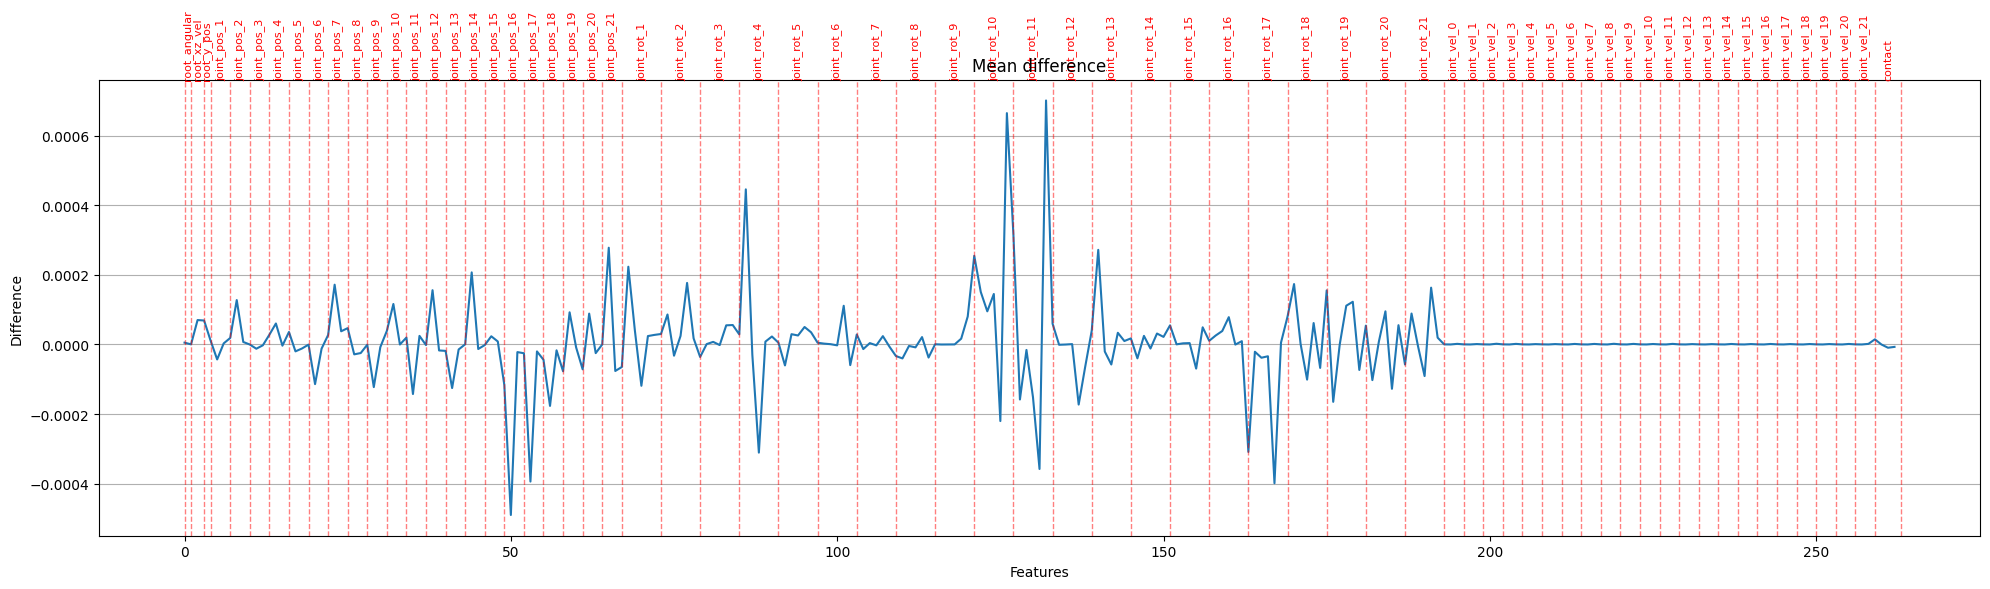

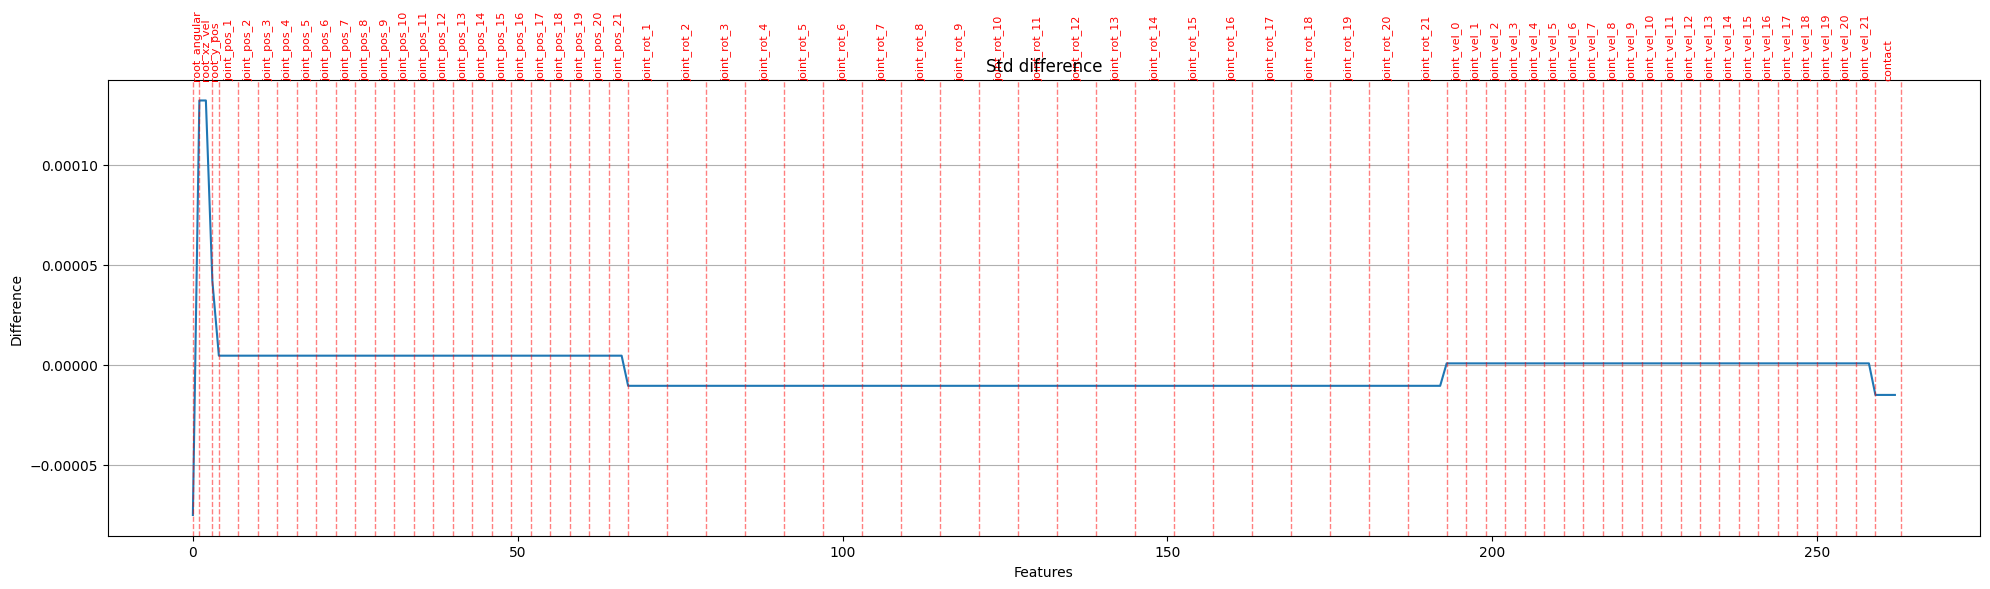

In [129]:
plot_difference_with_hml_sections("Mean difference", diff_mean_df)
plot_difference_with_hml_sections("Std difference", diff_std_df)